# Cliff Walking

We discuss Ex 6.6 from SB v2. This example shows the difference between SARSA and Q-learning.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [3]:
class Env:

    def __init__(self,xmax, ymax):
        self.done=False
        self.state=(0,0)
        self.ymax=ymax
        self.xmax=xmax

    def reset(self):
        self.state=(0,0)
        self.done=False
        return self.state,0,self.done

    def step(self,action):
        y,x=self.state
        if action==0: # up
            y=y+1
        elif action==1: # right
            x=x+1
        elif action==2: # down
            y=y-1
        else: # left
            x=x-1
        
        if x<0:
            x+=1
            r=-1
        elif x>self.xmax:
            x-=1
            r=-1            
        elif y>self.ymax:
            y-=1
            r=-1
        elif x==self.xmax and y==0:
            self.done=True
            r=0
        elif y==0 and x>0 and x<self.xmax:
            self.done=True
            r=-100
            y,x=(0,0)
        elif y<0:
            y+=1
            r=-1
        else:
            r=-1
        self.state=(y,x)
        return self.state,r,self.done
        



# SARSA

In [13]:
alpha=.5
epsilon=0.1

xmax=11
ymax=3
e=Env(xmax,ymax)

q=np.zeros(shape=(ymax+1,xmax+1,4))
total_rewards=[]
for episode in tqdm(range(500)):
    t=0
    (y,x),r,d=e.reset()
    t+=r
    if np.random.uniform()<epsilon:
        a=np.random.choice([0,1,2,3])
    else:
        a=np.argmax(q[y][x])
    while not d:
        (yp,xp),r,d=e.step(a)
        t+=r
        if np.random.uniform()<epsilon:
            ap=np.random.choice([0,1,2,3])
        else:
            ap=np.argmax(q[yp][xp])
        q[y][x][a] =q[y][x][a]+ alpha*(r+q[yp][xp][ap]-q[y][x][a])
        (y,x)=(yp,xp)
        a=ap
    total_rewards.append(t)


        
    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 3714.21it/s]


In [14]:
d={0:"⬆",1:"➡",2:"⬇",3:"⬅"}
x=np.asarray([d[a] for b in np.argmax(q,2)[::-1] for a in b ]).reshape(ymax+1,xmax+1)
x[-1][1:xmax+1]='X'
x

array([['➡', '⬇', '⬇', '➡', '➡', '➡', '➡', '➡', '➡', '➡', '⬇', '⬇'],
       ['➡', '➡', '➡', '⬆', '⬆', '⬆', '➡', '⬆', '➡', '⬇', '➡', '⬇'],
       ['⬆', '⬆', '⬆', '⬆', '➡', '⬆', '⬆', '⬆', '➡', '➡', '➡', '⬇'],
       ['⬆', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']],
      dtype='<U1')

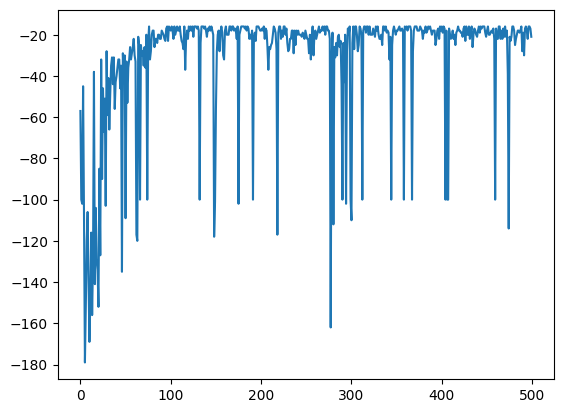

In [15]:
plt.plot(total_rewards)

In [16]:
total_rewards[-10:]

[-19, -30, -17, -16, -18, -22, -16, -16, -17, -21]

# Q- Learning

In [17]:
alpha=.5
epsilon=0.1
q=np.zeros(shape=(ymax+1,xmax+1,4))
total_rewards=[]
for episode in tqdm(range(500)):
    t=0
    (y,x),r,d=e.reset()
    t+=r
    while not d:
        if np.random.uniform()<epsilon:
            a=np.random.choice([0,1,2,3])
        else:
            a=np.argmax(q[y][x])
        (yp,xp),r,d=e.step(a)
        t+=r
        ap=np.argmax(q[yp][xp])
        q[y][x][a] =q[y][x][a]+ alpha*(r+q[yp][xp][ap]-q[y][x][a])
        (y,x)=(yp,xp)
    total_rewards.append(t)


        
    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 3934.34it/s]


In [18]:
d={0:"⬆",1:"➡",2:"⬇",3:"⬅"}
x=np.asarray([d[a] for b in np.argmax(q,2)[::-1] for a in b ]).reshape(ymax+1,xmax+1)
x[-1][1:xmax+1]='X'
x

array([['⬇', '➡', '➡', '⬆', '➡', '➡', '➡', '➡', '➡', '⬅', '➡', '⬇'],
       ['⬇', '⬇', '➡', '➡', '➡', '⬇', '➡', '⬇', '⬇', '⬇', '➡', '⬇'],
       ['➡', '➡', '➡', '➡', '➡', '➡', '➡', '➡', '➡', '➡', '➡', '⬇'],
       ['⬆', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']],
      dtype='<U1')

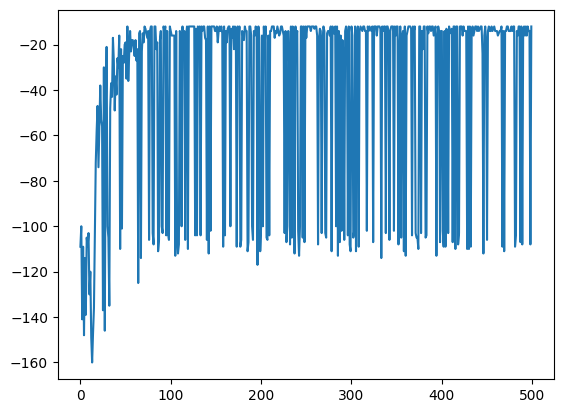

In [19]:
plt.plot(total_rewards)

In [20]:
total_rewards[-10:]

[-14, -12, -16, -12, -16, -12, -14, -14, -108, -12]

# With decaying epsilon

## SARSA

In [23]:
alpha=.5
epsilon=0.1

xmax=11
ymax=3
e=Env(xmax,ymax)

q=np.zeros(shape=(ymax+1,xmax+1,4))
total_rewards=[]
for episode in tqdm(range(500)):
    t=0
    (y,x),r,d=e.reset()
    t+=r
    if np.random.uniform()<epsilon/(episode+1):
        a=np.random.choice([0,1,2,3])
    else:
        a=np.argmax(q[y][x])
    while not d:
        (yp,xp),r,d=e.step(a)
        t+=r
        if np.random.uniform()<epsilon/(episode+1):
            ap=np.random.choice([0,1,2,3])
        else:
            ap=np.argmax(q[yp][xp])
        q[y][x][a] =q[y][x][a]+ alpha*(r+q[yp][xp][ap]-q[y][x][a])
        (y,x)=(yp,xp)
        a=ap
    total_rewards.append(t)


        
    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5596.29it/s]


In [24]:
d={0:"⬆",1:"➡",2:"⬇",3:"⬅"}
x=np.asarray([d[a] for b in np.argmax(q,2)[::-1] for a in b ]).reshape(ymax+1,xmax+1)
x[-1][1:xmax+1]='X'
x

array([['⬆', '⬆', '➡', '➡', '➡', '➡', '➡', '➡', '➡', '⬇', '➡', '⬇'],
       ['⬇', '⬅', '➡', '➡', '➡', '⬆', '➡', '➡', '➡', '➡', '⬇', '⬇'],
       ['➡', '➡', '➡', '➡', '➡', '➡', '➡', '➡', '➡', '➡', '➡', '⬇'],
       ['⬆', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']],
      dtype='<U1')

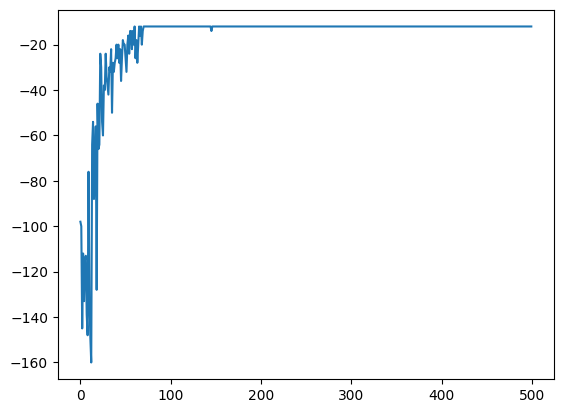

In [25]:
plt.plot(total_rewards)

In [26]:
total_rewards[-10:]

[-12, -12, -12, -12, -12, -12, -12, -12, -12, -12]

## Q - Learning

In [27]:
alpha=.5
epsilon=0.1
q=np.zeros(shape=(ymax+1,xmax+1,4))
total_rewards=[]
for episode in tqdm(range(500)):
    t=0
    (y,x),r,d=e.reset()
    t+=r
    while not d:
        if np.random.uniform()<epsilon/(episode+1):
            a=np.random.choice([0,1,2,3])
        else:
            a=np.argmax(q[y][x])
        (yp,xp),r,d=e.step(a)
        t+=r
        ap=np.argmax(q[yp][xp])
        q[y][x][a] =q[y][x][a]+ alpha*(r+q[yp][xp][ap]-q[y][x][a])
        (y,x)=(yp,xp)
    total_rewards.append(t)


        
    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 4396.80it/s]


In [28]:
d={0:"⬆",1:"➡",2:"⬇",3:"⬅"}
x=np.asarray([d[a] for b in np.argmax(q,2)[::-1] for a in b ]).reshape(ymax+1,xmax+1)
x[-1][1:xmax+1]='X'
x

array([['⬆', '➡', '➡', '⬅', '➡', '➡', '➡', '➡', '⬇', '➡', '⬇', '⬇'],
       ['⬆', '➡', '➡', '➡', '➡', '➡', '➡', '➡', '⬇', '➡', '⬇', '⬇'],
       ['➡', '➡', '➡', '➡', '➡', '➡', '➡', '➡', '➡', '➡', '➡', '⬇'],
       ['⬆', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']],
      dtype='<U1')

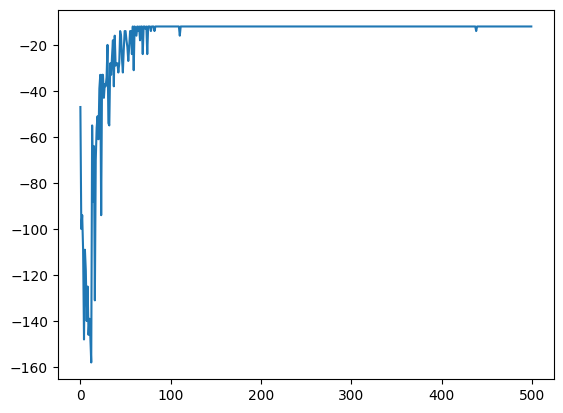

In [29]:
plt.plot(total_rewards)

In [30]:
total_rewards[-10:]

[-12, -12, -12, -12, -12, -12, -12, -12, -12, -12]